In [21]:
import sys
import os.path
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

<h1>Dependency Assertions

In [22]:
modulename = ['pandas','numpy','matplotlib','sklearn']
for module in modulename:
    if module not in sys.modules:
        print('You have not imported the {} module'.format(module))

<h1> Data Insights

Taking count of all sentiment and emotion tags respectively associated with Reddit posts. Then creating a dictionary to create key-value pairings.

Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [23]:
with open("Emotion_final.csv", "r") as read_content:
    file = pd.read_csv(read_content)

In [24]:
emotion = file["Emotion"].value_counts().to_dict()
emotion_values = emotion.keys()
emotion_frequency = emotion.values()

<h1>Data Insights

Visualization of the dataset depicts that some classes are uneven, this affects the evaluation metrics that should be used when developing a conclusion about the models.

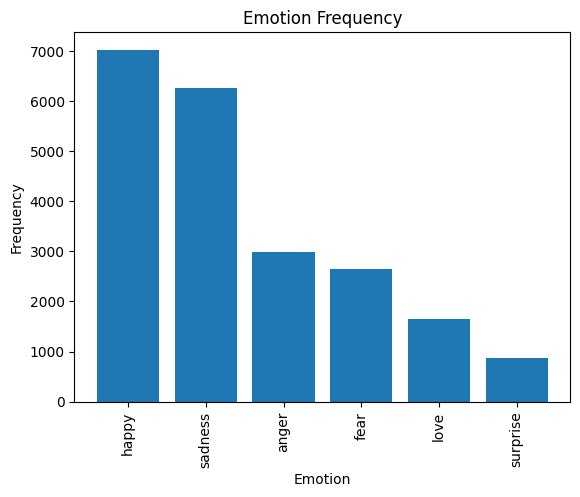

In [25]:
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.title("Emotion Frequency")
plt.xticks(rotation= 90) #done for readbility purposes
plt.bar(emotion_values, emotion_frequency)
plt.show()

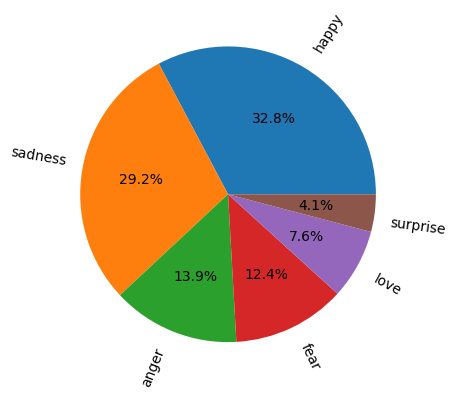

In [26]:
emotionLabels = []
sizes = []
for x, y in emotion.items():
    emotionLabels.append(x)
    sizes.append(y)
plt.pie(sizes, labels=emotionLabels, rotatelabels = True, autopct ='%1.1f%%')
plt.show()

Plotting of Frequency vs. Emotion and Frequency vs. Sentiment <br>
Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

<h1>Extraction of tokens/words</h1>

Returns the frequency of words in a post in relation to the whole vocabulary.

In [27]:
post = file["Text"]
vectorizer = CountVectorizer()
#vectorize posts into words that were used
X = vectorizer.fit_transform(file["Text"])


leEmo = preprocessing.LabelEncoder()
leSent = preprocessing.LabelEncoder()

encodedEmo = leEmo.fit_transform(file["Emotion"]) #change 0 to the column of emotions with no separation

Given that when X.toarray() is used, the occurrences of words in a post is counted for example <br> "This document is the second document."<br> the word document is used twice [0 2 0 1 0 1 1 0 1] mapping to the array of unique words ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
<br>
Sources: <br>
https://stackoverflow.com/questions/27488446/how-do-i-get-word-frequency-in-a-corpus-using-scikit-learn-countvectorizer
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

<h2>2.2 Training and Test data split</h2>

In [28]:
X_train,X_test,yemo_train, yemo_test = train_test_split(X,encodedEmo, test_size = 0.2, train_size=0.8)

<h1>Metrics and Evaluation Function

After a model makes a prediction this function can be used to generate the desired metrics.
Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [29]:
def metrics(true_y,prediction_y):
    print(f"Accuracy: {accuracy_score(y_true=true_y,y_pred= prediction_y)}")
    print(f"Precision (Weighted): {precision_score(y_true=true_y,y_pred= prediction_y, average='weighted')}")
    print(f"F1 Score (Weighted): {f1_score(y_true=true_y,y_pred= prediction_y,average='weighted')}")
    print(f"F1 Score (Macro): {f1_score(y_true=true_y,y_pred= prediction_y,average='macro')}")
    print(classification_report(y_true=true_y,y_pred= prediction_y, zero_division='warn'))
    confusion_matrix(y_true=true_y,y_pred= prediction_y)

<h2>Multinomial Naive Bayes Classifier (naive bayes.MultinomialNB.html)
with the default parameters.</h2>

Source: https://www.delftstack.com/howto/python/how-to-get-dictionary-keys-as-a-list-in-python/

In [30]:
classifier = MultinomialNB()
if (os.path.exists('models/MNB1_model.pickle')):
    pickle_in = open('models/MNB1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/MNB1_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)


pickle file used


<h1>Analysis

Metrics: F1 Score and Weighted Precision
Confusion Matrix: Comparison of predicted labels vs. true labels

Score for Emotion: 0.8364398881640261
Accuracy: 0.8364398881640261
Precision (Weighted): 0.8564198399730631
F1 Score (Weighted): 0.8201684419699724
F1 Score (Macro): 0.7217522535033174
              precision    recall  f1-score   support

           0       0.94      0.75      0.84       626
           1       0.92      0.69      0.79       527
           2       0.80      0.98      0.88      1406
           3       0.97      0.39      0.56       299
           4       0.80      0.97      0.88      1260
           5       0.98      0.24      0.39       174

    accuracy                           0.84      4292
   macro avg       0.90      0.67      0.72      4292
weighted avg       0.86      0.84      0.82      4292



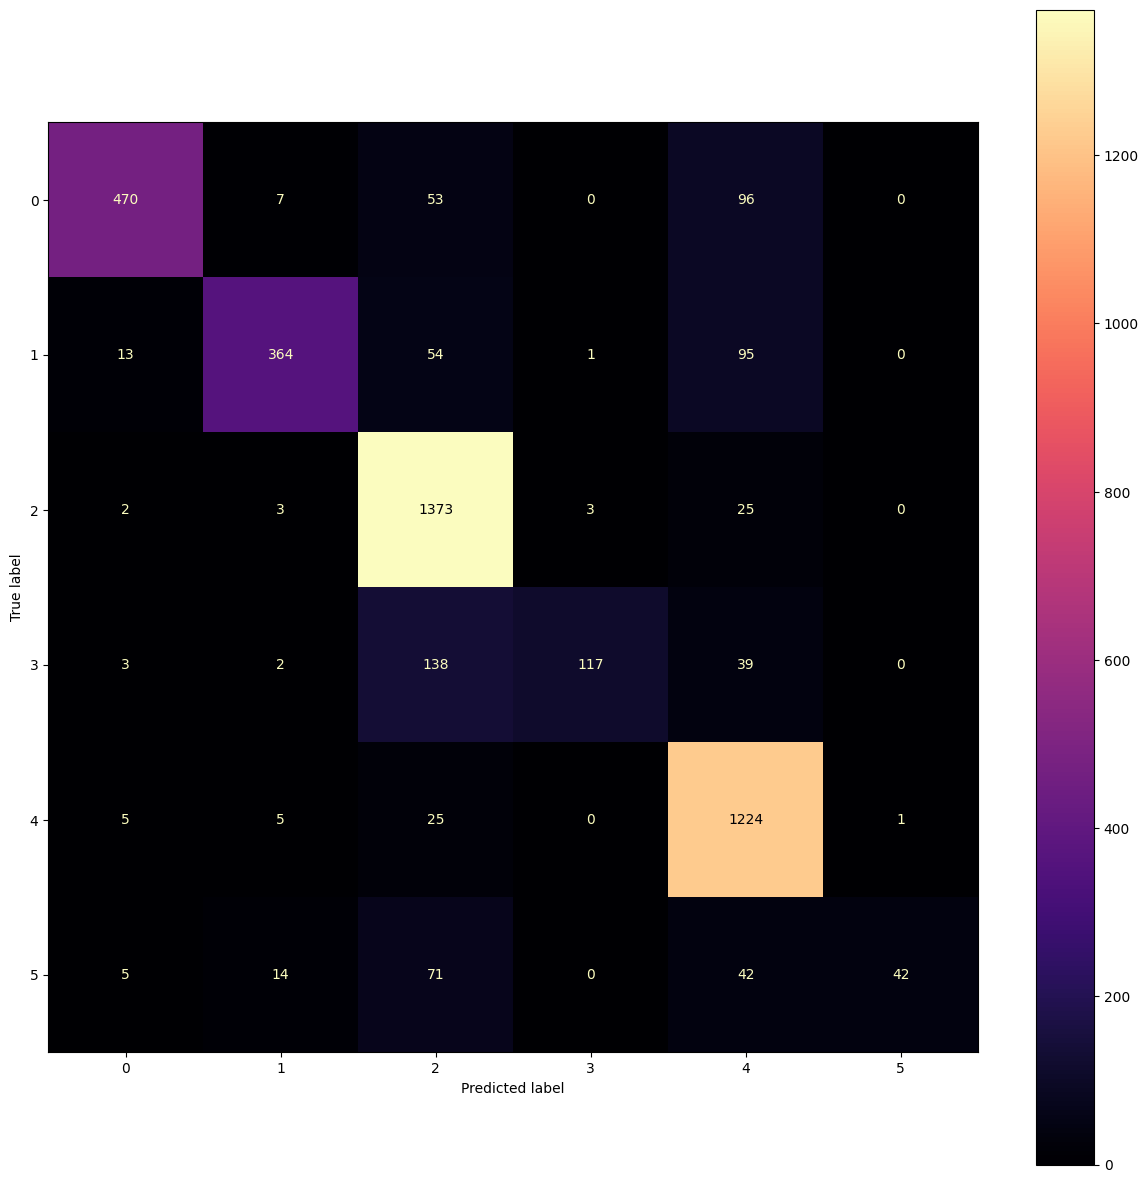

In [31]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test,yemo_test)}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

<h2>cross validation</h2>
<body>from sklearn.model_selection import cross_val_score</body>

<h2>Decision Tree (tree.DecisionTreeClassifier) with the default parameters.</h2>

In [32]:
classifier = DecisionTreeClassifier()
if (os.path.exists('models/DT1_model.pickle')):
    pickle_in = open('models/DT1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/DT1_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/DT1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

pickle file used


<h1>Analysis

Metrics: F1 Score and Weighted Precision
Confusion Matrix: Comparison of predicted labels vs. true labels

Score for Emotion: 0.96784715750233
Accuracy: 0.96784715750233
Precision (Weighted): 0.9678876161821574
F1 Score (Weighted): 0.9678612606738656
F1 Score (Macro): 0.9631745417619492
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       626
           1       0.97      0.96      0.96       527
           2       0.98      0.97      0.97      1406
           3       0.93      0.94      0.93       299
           4       0.97      0.97      0.97      1260
           5       0.97      0.97      0.97       174

    accuracy                           0.97      4292
   macro avg       0.96      0.96      0.96      4292
weighted avg       0.97      0.97      0.97      4292



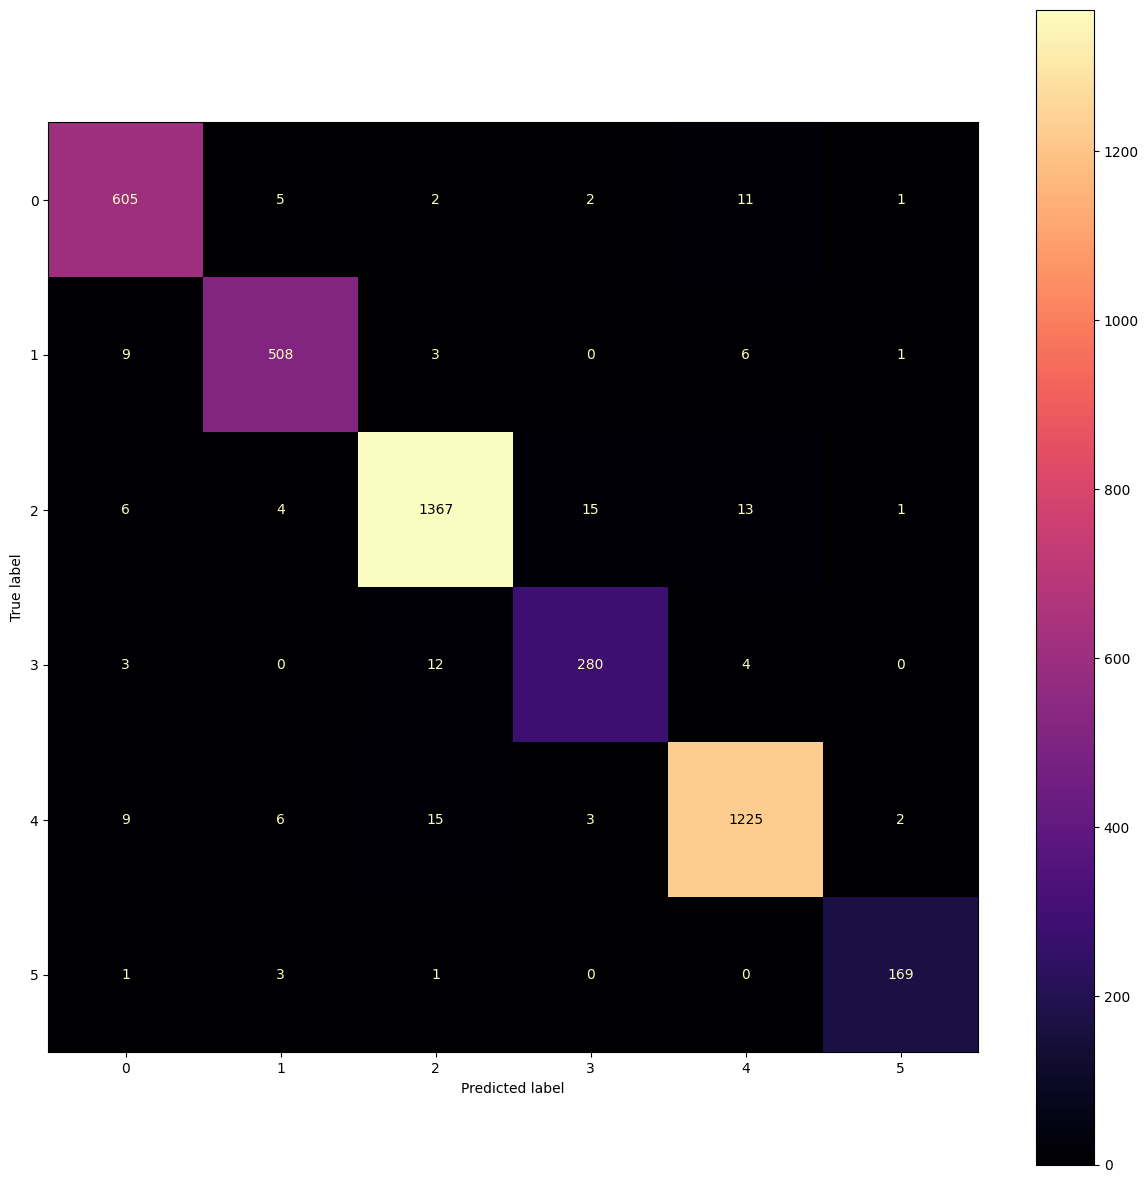

In [33]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test,yemo_test)}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')


<h2>Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.</h2>

In [34]:
classifier = MLPClassifier()
if (os.path.exists('models/MLP1_model.pickle')):
    pickle_in = open('models/MLP1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    MLP1 = classifier.fit(X_train, yemo_train)
    with open('models/MLP1_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/MLP1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

pickle file used


<h1>Analysis

Metrics: F1 Score and Weighted Precision
Confusion Matrix: Comparison of predicted labels vs. true labels

Score for Emotion: 0.9743709226467847
Accuracy: 0.9743709226467847
Precision (Weighted): 0.9743854282832815
F1 Score (Weighted): 0.9743568457476112
F1 Score (Macro): 0.969162798150605
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       626
           1       0.98      0.96      0.97       527
           2       0.98      0.98      0.98      1406
           3       0.96      0.95      0.95       299
           4       0.98      0.98      0.98      1260
           5       0.98      0.96      0.97       174

    accuracy                           0.97      4292
   macro avg       0.97      0.97      0.97      4292
weighted avg       0.97      0.97      0.97      4292



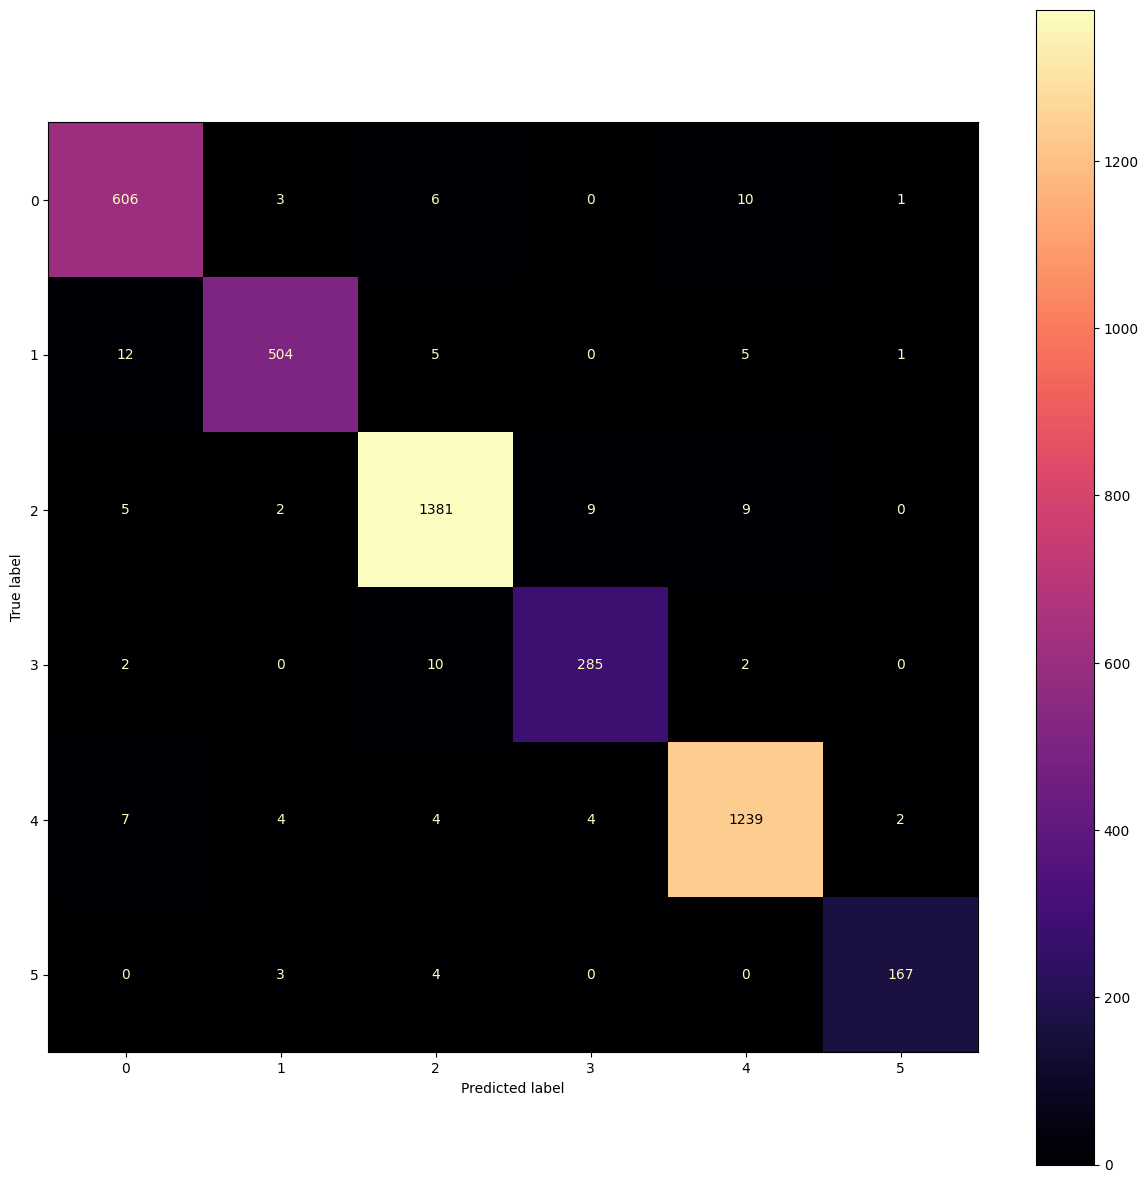

In [35]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test,yemo_test)}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

<h1>Scoring Metrics


In [36]:
#sorted(sklearn.metrics.SCORERS.keys())

<h2>Multinomial Naive Bayes Classifier found using GridSearchCV</h2>

input parameter requires a model object

using the following alpha parameters 0.5,0,0.36,1


In [37]:
parameters = {"alpha":(0.5,0,0.36,1)}
clfMNB = MultinomialNB()

classifier = GridSearchCV(estimator=clfMNB, param_grid=parameters,n_jobs=-1, scoring="f1_weighted")

if (os.path.exists('models/MNB1GridCV_model.pickle')):
    pickle_in = open('models/MNB1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/MNB1GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

<h1>Analysis

Metrics: F1 Score and Weighted Precision
Confusion Matrix: Comparison of predicted labels vs. true labels

Best Estimator based on hyperparameter and using F1-Score to optimize the score

Best estimator (Emotion): MultinomialNB(alpha=0.36), Best Score: 0.7669025245652594
Accuracy: 0.7851817334575956
Precision (Weighted): 0.7792468539595395
F1 Score (Weighted): 0.7795085080982548
F1 Score (Macro): 0.6992745030591405
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       626
           1       0.76      0.70      0.73       527
           2       0.82      0.86      0.84      1406
           3       0.69      0.56      0.62       299
           4       0.79      0.88      0.83      1260
           5       0.55      0.33      0.41       174

    accuracy                           0.79      4292
   macro avg       0.73      0.68      0.70      4292
weighted avg       0.78      0.79      0.78      4292



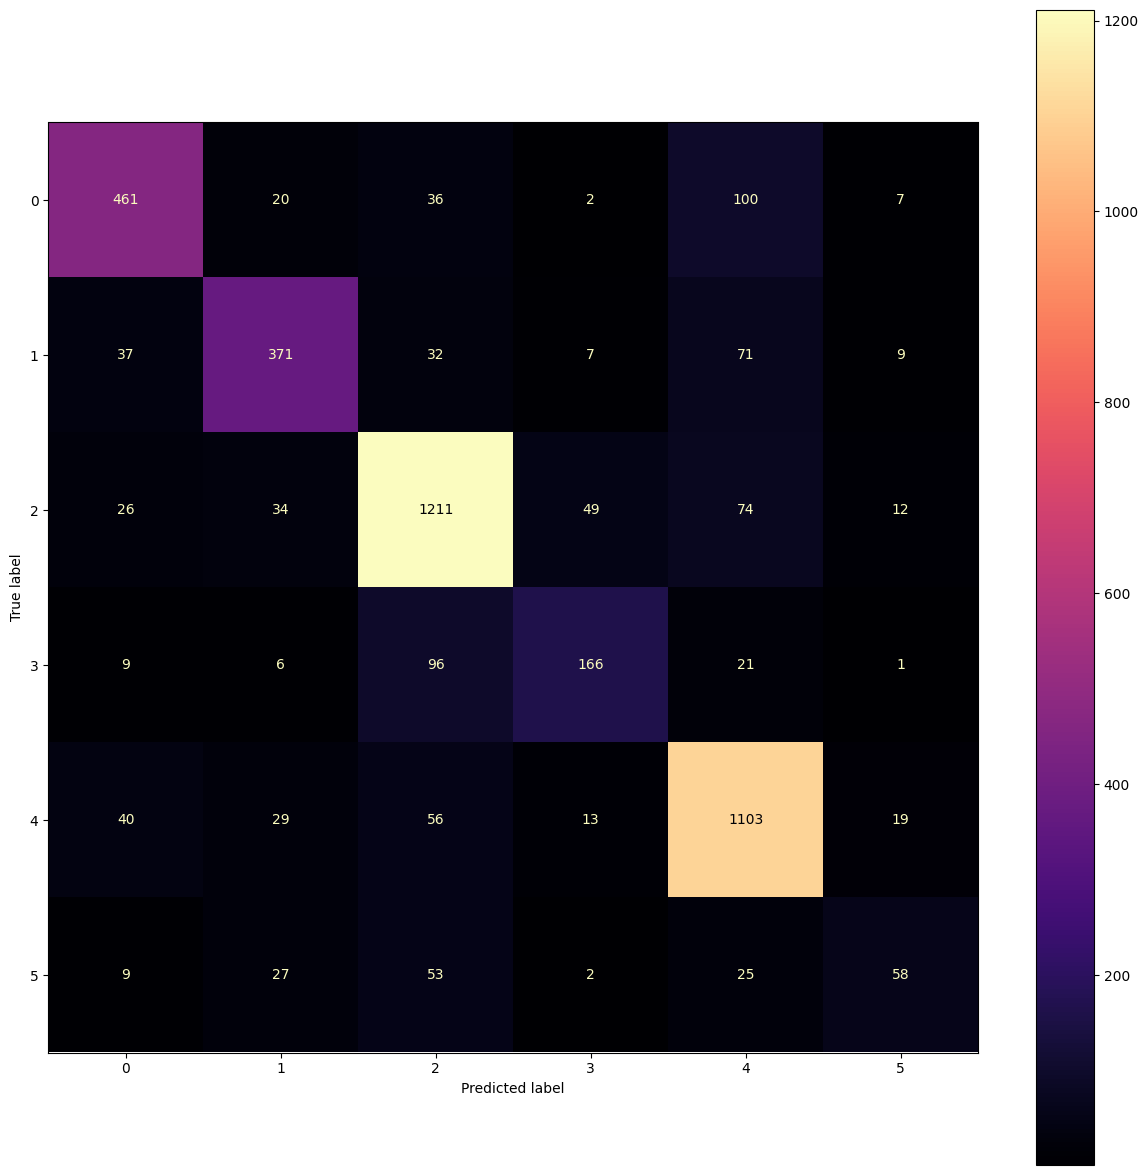

In [38]:
y_emo_predict = clf1.best_estimator_.predict(X_test)

print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

<h2>Decision Tree Classifier found using GridSearchCV</h2>

input parameter requires a model object

using the various value for the following parameters: criterion, max_depth, min_samples


In [39]:
parameters = {"criterion":("gini","entropy"),"max_depth":(20,50,10,3),"min_samples_split":(12,5,30,100)}
clfDT = DecisionTreeClassifier()

classifier = GridSearchCV(estimator=clfDT, param_grid=parameters,n_jobs=-1, scoring="f1_weighted")

if (os.path.exists('models/DT1GridCV_model.pickle')):
    pickle_in = open('models/DT1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/DT1GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/DT1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)


<h1>Analysis

Metrics: F1 Score and Weighted Precision
Confusion Matrix: Comparison of predicted labels vs. true labels

Best Estimator based on hyperparameter and using F1-Score to optimize the score

Best estimator (Emotion): DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_split=100), Best Score: 0.44489386728525576
Accuracy: 0.4804287045666356
Precision (Weighted): 0.5353532248903828
F1 Score (Weighted): 0.4700275642935692
F1 Score (Macro): 0.5257297466965902
              precision    recall  f1-score   support

           0       0.70      0.20      0.32       626
           1       0.81      0.43      0.56       527
           2       0.42      0.68      0.52      1406
           3       0.70      0.60      0.65       299
           4       0.39      0.36      0.37      1260
           5       0.79      0.70      0.74       174

    accuracy                           0.48      4292
   macro avg       0.64      0.49      0.53      4292
weighted avg       0.54      0.48      0.47      4292



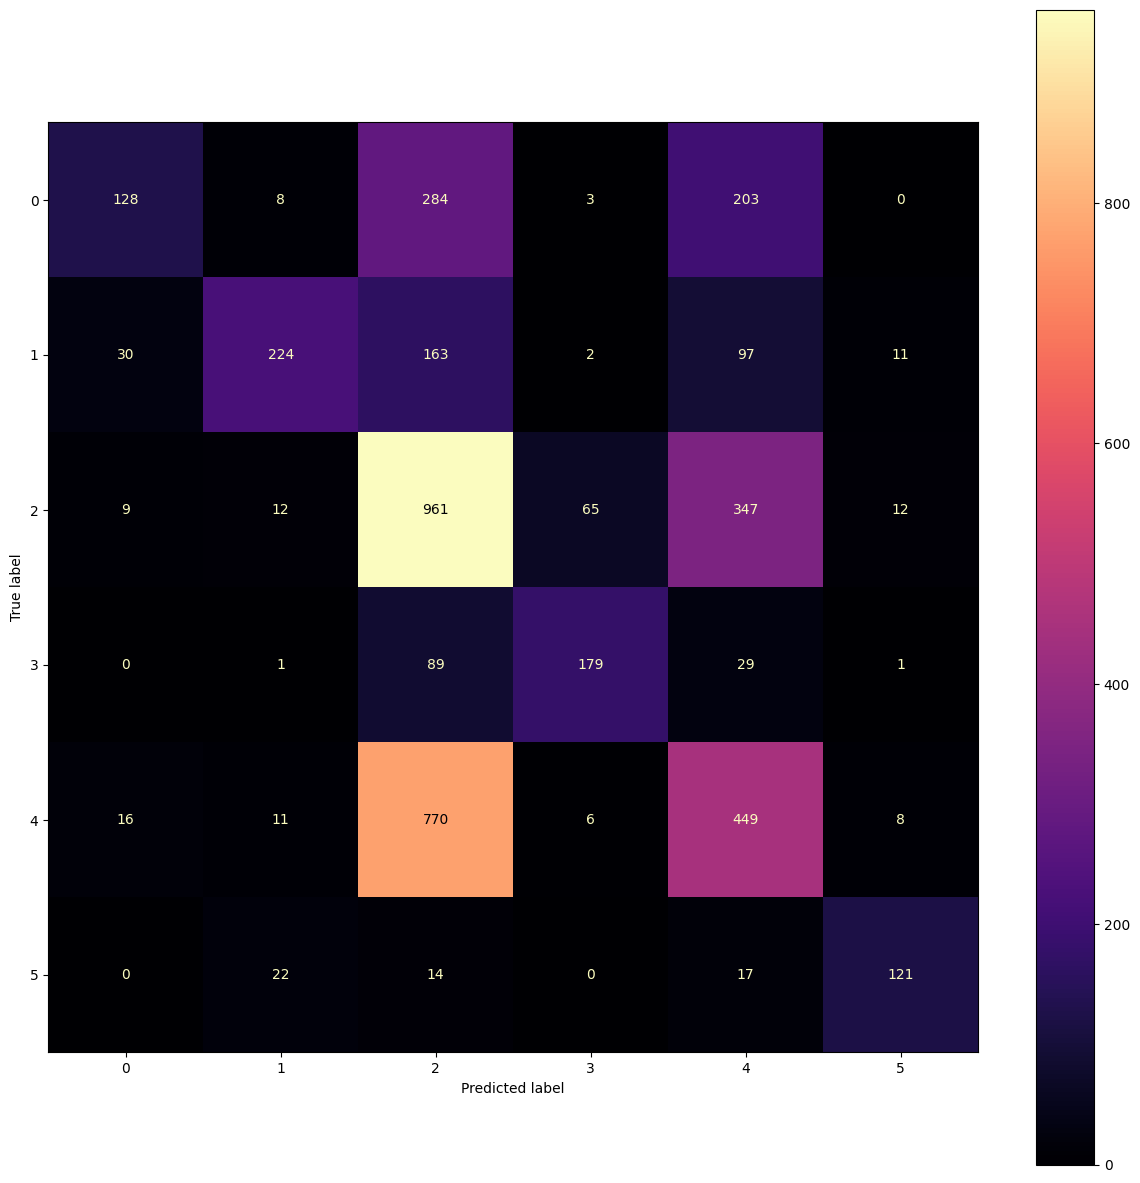

In [40]:
y_emo_predict = clf1.best_estimator_.predict(X_test)

print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')